In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import rasterio
from rasterio.plot import show

from osgeo import gdal

import os
import numpy as np
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

os.getcwd()

'/data/private/Thesis/May'

##### **Crop with gdal** and **Call shapefile**

In [66]:
pred = gdal.Open('Output/pred_slf_cloudy_5e-6.tif')

pred = gdal.Warp("pred_clip.tif", pred, cutlineDSName = "Data/04_Validation/Extent_predicted_edge-removal.shp",
                  cropToCutline = True, dstNodata = np.nan)

#pred = pred.GetRasterBand(1).ReadAsArray()
pred = rasterio.open("pred_clip.tif")
print(pred.crs)

Warning 1: for band 1, destination nodata value has been rounded to 0, Byte being an integer datatype.


EPSG:32647


In [67]:
import geopandas as gpd

val = gpd.read_file("Data/04_Validation/Validation2.shp")
print(type(val))

<class 'geopandas.geodataframe.GeoDataFrame'>


In [68]:
val.head()

,Class,geometry
0,1,POINT (670984.904 140940.473)
1,1,POINT (671862.628 141505.122)
2,1,POINT (670778.150 144304.659)
3,1,POINT (798429.002 177898.933)
4,1,POINT (782828.189 174076.285)


#### **Visualize**

epsg:32647


<AxesSubplot: >

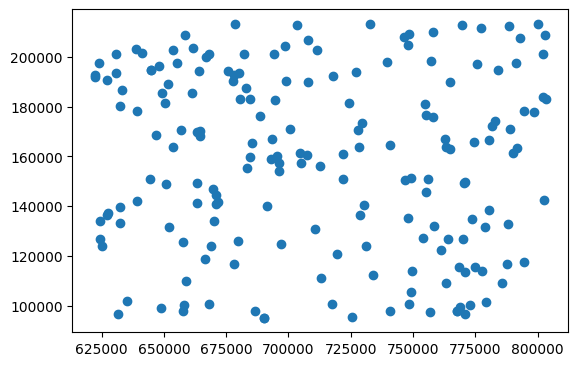

In [24]:
#Plot point shapefile
#print(val.crs)
#val.plot()

<AxesSubplot: >

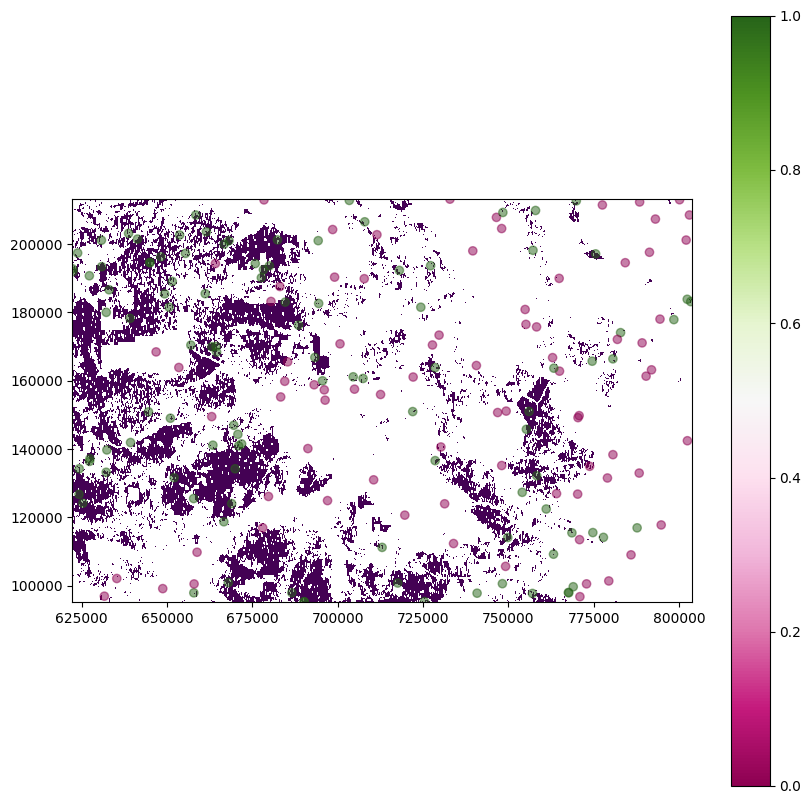

In [69]:
fig, ax = plt.subplots(figsize=(10,10))
val.plot(ax=ax, column='Class', legend=True, cmap='PiYG', alpha=0.5)
show(pred, ax=ax)

In [70]:
#extract xy from point geom
for point in val['geometry']:
    print(point.xy[0][0],point.xy[1][0])

670984.9041743029 140940.4733589901
671862.6280243163 141505.12174716336
670778.1497115089 144304.65930381263
798429.0017090254 177898.93292454645
782828.1885931038 174076.2846068868
679741.3229876842 126112.57337788906
770923.5639318309 96775.20870643809
691275.9221098876 140139.2910744
680475.0667317405 183211.57250592762
754882.2121853821 180859.68653756467
728535.2539947769 136607.11054383195
722095.9799443213 161084.08064228334
711494.1713584794 202755.27423195067
685348.8600844543 165529.88721575672
635322.4372887639 102095.99955234154
664192.8931951483 194310.34147116364
762922.9213684404 166766.32233274056
727749.9296276405 170468.04994761496
658824.8749447427 109783.03371742545
698525.167554608 204269.08669944783
764951.7030795689 162802.4270631907
748028.4230563816 135170.22235717264
646834.9332703783 168438.49174748015
678042.4915810018 116935.7771761954
653491.6908037193 163877.86439836974
684502.5595779617 159832.74054971736
758233.1946639018 175757.14401781358
746838.2885

In [71]:
#extract point value from raster
pixel_values = []

for point in val['geometry']:
    x = point.xy[0][0]
    y = point.xy[1][0]
    row, col = pred.index(x,y)
    pixel_value = pred.read(1, window=((row, row+1), (col, col+1)))
    pixel_values.append(pixel_value[0][0])

prede = np.array(pixel_values)

In [72]:
prede

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0], dtype=uint8)

In [73]:
vale = val['Class'].to_numpy()
vale

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

#### **Accuracy assessment**

In [74]:
f1 = f1_score(vale, prede)
accuracy = accuracy_score(vale, prede)
print('f1: ',  f1)
print('accuracy: ',  accuracy)

cfm = confusion_matrix(vale, prede)

df = pd.DataFrame(cfm, columns=['NOP', 'OP'], index=['NOP', 'OP'])
print(df)

from sklearn.metrics import classification_report
print('Train report', classification_report(vale, prede))

f1:  0.8842105263157896
accuracy:  0.8817204301075269
     NOP  OP
NOP   80   0
OP    22  84
Train report               precision    recall  f1-score   support

           0       0.78      1.00      0.88        80
           1       1.00      0.79      0.88       106

    accuracy                           0.88       186
   macro avg       0.89      0.90      0.88       186
weighted avg       0.91      0.88      0.88       186

